# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.



In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [6]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           5.02e-23
Time:                        16:37:25   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

(0.0, 10.5)

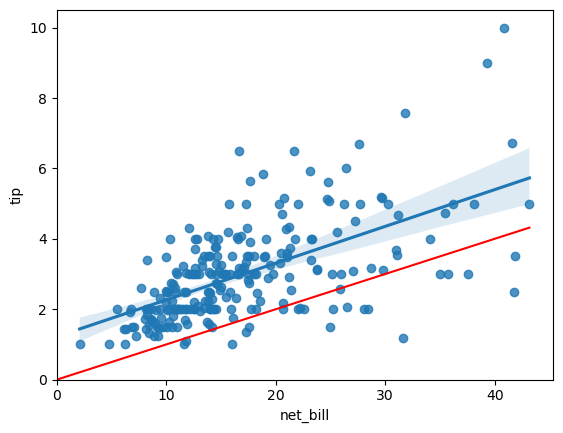

In [4]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [29]:
#alterando a variável resposta para 'tip_pct'

reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.52e-06
Time:                        17:07:09   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 4.536708492092115)

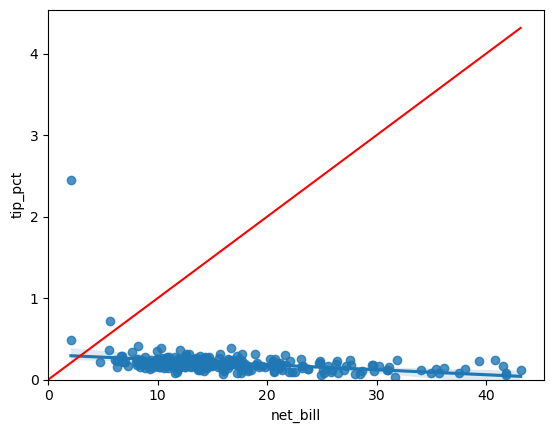

In [10]:
# Gráfico de dispersão com a variável 'tip_pct'
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

(0.0, 4.536409634193194)

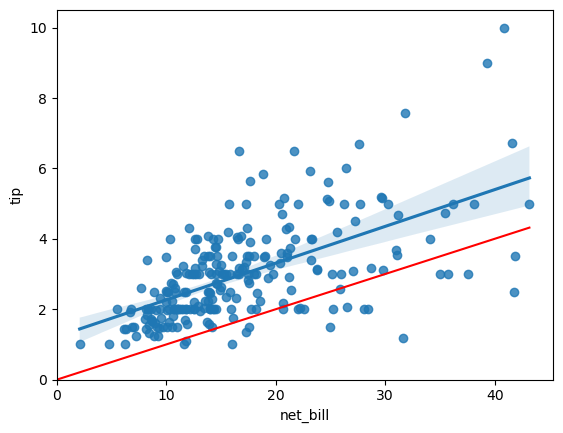

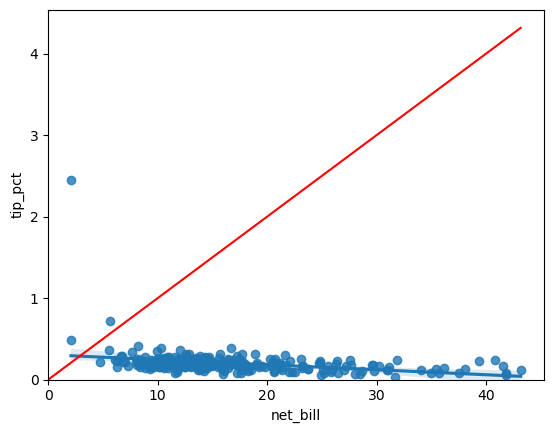

In [27]:
# Plotando os gráficos juntos para faclitar a análise

# Gráfico de dispersão com a variável 'tip'
plt.subplots(1)
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

# Gráfico de dispersão com a variável 'tip_pct'
plt.subplots(1)
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)


No gráfico 2, quanto maior o valor da conta, menor a porcentagem da gorgeta em função dela
No gráfico 1, quanto maior o valor da conta, maior o valor da gorgeta.

A linha de tendência de 2 é mais inclinada que 1, mas a curva de regressão não acompanha essa tendência

O R-quadrado do modelo 2 é de 9% contra 33% do modelo 1. 
Parece não ser útil comparar diretamente os R-quadrados. Pois apesar de um número ser menor que o outro, ainda sim o gráfico 2 parece ter apenas 1 outlier enquanto as observações parecem acompanhar fielmente a linha regressão

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [59]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           5.02e-23
Time:                        10:42:30   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#reg.predict(tips)
reg.fittedvalues
# ambos métodos '''.predict''' e '''.fittedvalues''' retornam os mesmo valores, aparentemente

0      2.918050
1      2.192915
2      3.070031
3      3.354125
4      3.414719
         ...   
239    3.626300
240    3.831920
241    3.383925
242    2.926990
243    2.898184
Length: 244, dtype: float64

In [49]:
# atribuindo nova variável para o valor predito de 'tip_pct'
tips['predict_values_tip_pct'] = reg.predict(tips)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,predict_values_tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,2.918050
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,2.192915
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,3.070031
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3.354125
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,3.414719


In [51]:
#atribuindo nova variavel para o valor predito de 'tip'
tips['predict_values_tip'] = tips.predict_values_tip_pct * tips.net_bill
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,predict_values_tip_pct,predict_values_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,2.918050,46.630446
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,2.192915,19.034500
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,3.070031,53.756242
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3.354125,68.323532
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,3.414719,71.640801


In [60]:
#ajustando o modelo a partir do 'predict_values_tip'
reg3 = smf.ols('predict_values_tip ~ net_bill', data = tips).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     predict_values_tip   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     6516.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):          5.60e-177
Time:                        10:43:25   Log-Likelihood:                -871.61
No. Observations:                 244   AIC:                             1747.
Df Residuals:                     242   BIC:                             1754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.8814      1.285    -28.704      0.000     -39.412     -34.350
net_bill       5.5754      0.069     80.724      0.000       5.439       5.711
==============================================================================
Omnibus:                       97.034   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.025
Skew:                           1.782   Prob(JB):                     5.74e-62
Kurtosis:                       6.878   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
reg3.rsquared

# o R-quadrado já aparece no summary da reg3, mas como foi solicitado especificamente, apresentei uma linha só pra isso

0.9641926667353682

(0.0, 256.1455315653285)

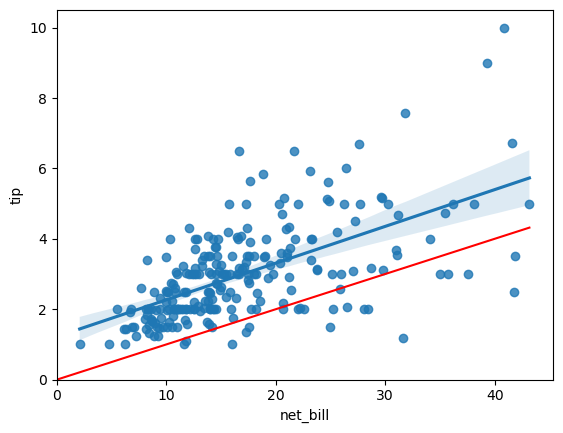

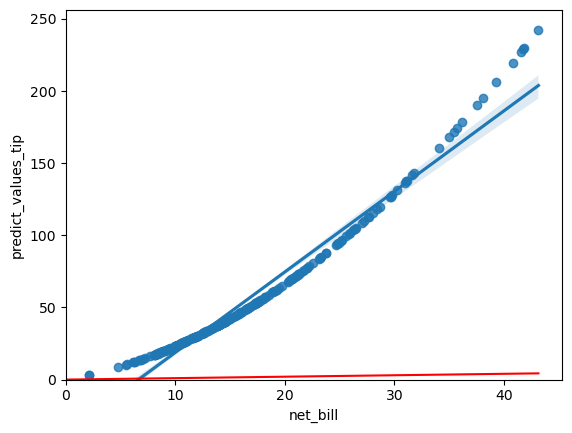

In [62]:
# plotando um gráfico para comparar só por curiosidade rsrs

plt.subplots(1)
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

# Gráfico de dispersão com a variável 'tip_pct'
plt.subplots(1)
sns.regplot(y = 'predict_values_tip', x = 'net_bill', data = tips)

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

- Após o ajuste, o R-quadrado recebe 96% de confiança, o que pode indicar que de fato o modelo está mais útil e confiável.
- Os pontos, acompanham a curva de regressão e a variância fica menor para maiores valores